# Lab 1

### 1. Read the uploaded dataset using pandas and display the dataframe.

In [1]:
import pandas as pd  # Import pandas library
df = pd.read_excel('Data_Train.xlsx')  # Read the dataset from an Excel file
df.head(2)  # Display the first 2 rows of the dataframe

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


### 2. Find the total number of null values in the dataset.

In [2]:
total_nulls = df.isnull().sum().sum()  # Calculate the total number of null values
print(f'Total number of null values in the dataset: {total_nulls}')  # Print the total number of null values

Total number of null values in the dataset: 2


### 3. Display the summary statistics of the Dataset

In [3]:
df.describe()  # Display summary statistics of the dataframe

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


### 4. Find and remove rows with null values in dataset

In [4]:
df = df.dropna()  # Remove rows with null values
print(df.isna().sum().sum())  # Verify that there are no null values left

0


### 5. Replace null values in a specific column with mean or median of that column

In [5]:
mean_price = df['Price'].mean()  # Calculate the mean of the 'Price' column
df['Price'].fillna(mean_price, inplace=True)  # Replace null values in 'Price' column with the mean
print(df['Price'].isnull().sum())  # Verify that there are no null values left in 'Price' column

0


### 6. Create a scatter plot to visualize the relationship between two numerical columns

In [6]:
def duration_to_hours(duration):  # Function to convert duration from string to hours
    time_parts = duration.split()  # Split the duration string into parts
    hours = int(time_parts[0].replace('h', '')) if 'h' in time_parts[0] else 0  # Extract hours
    minutes = int(time_parts[1].replace('m', '')) if len(time_parts) > 1 else 0  # Extract minutes
    return hours + minutes / 60  # Convert total duration to hours

df['Duration_hours'] = df['Duration'].apply(duration_to_hours)  # Apply the function to the 'Duration' column
print(df[['Duration', 'Duration_hours']].head())  # Display the first few rows of 'Duration' and 'Duration_hours' columns

  Duration  Duration_hours
0   2h 50m        2.833333
1   7h 25m        7.416667
2      19h       19.000000
3   5h 25m        5.416667
4   4h 45m        4.750000


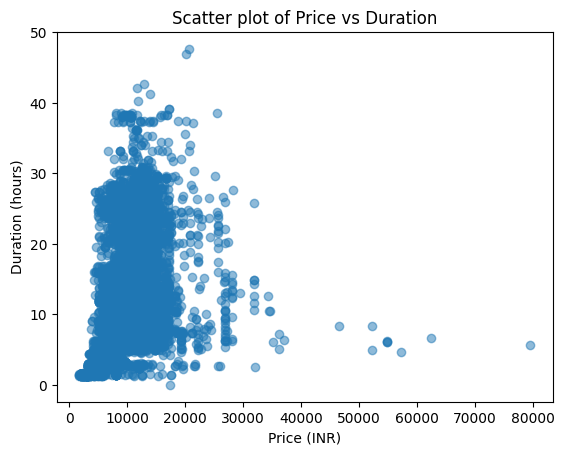

In [7]:
import matplotlib.pyplot as plt  # Import matplotlib for plotting

plt.scatter(df['Price'], df['Duration_hours'], alpha=0.5)  # Create a scatter plot
plt.xlabel('Price (INR)')  # Set x-axis label
plt.ylabel('Duration (hours)')  # Set y-axis label
plt.title('Scatter plot of Price vs Duration')  # Set plot title
plt.show()  # Display the plot

### 7. Build a Regression Plot for the same columns and analyze the pattern.

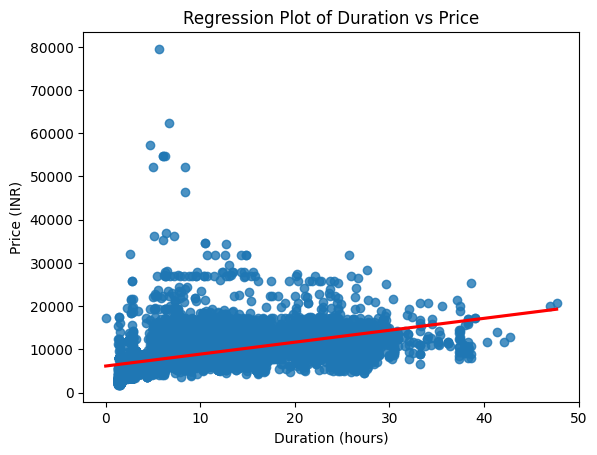

In [8]:
import seaborn as sns  # Import seaborn for advanced plotting

sns.regplot(x='Duration_hours', y='Price', data=df, line_kws={"color": "red"})  # Create a regression plot
plt.xlabel('Duration (hours)')  # Set x-axis label
plt.ylabel('Price (INR)')  # Set y-axis label
plt.title('Regression Plot of Duration vs Price')  # Set plot title
plt.show()  # Display the plot

### 8. Convert a Column's datatype (e.g. from string to datetime)

In [9]:
print(df['Date_of_Journey'].head())  # Display the first few rows of 'Date_of_Journey' column
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y')  # Convert 'Date_of_Journey' to datetime
print(df['Date_of_Journey'].head())  # Display the first few rows of the converted 'Date_of_Journey' column

0    24/03/2019
1     1/05/2019
2     9/06/2019
3    12/05/2019
4    01/03/2019
Name: Date_of_Journey, dtype: object
0   2019-03-24
1   2019-05-01
2   2019-06-09
3   2019-05-12
4   2019-03-01
Name: Date_of_Journey, dtype: datetime64[ns]


### 9. Group the data by a specific categorical column and calculate aggregated statistics

In [10]:
grouped_data = df.groupby('Airline')['Price'].agg(['mean', 'median', 'min', 'max', 'count'])  # Group by 'Airline' and calculate statistics
print(grouped_data)  # Display the aggregated statistics

                                           mean   median    min    max  count
Airline                                                                      
Air Asia                            5590.260188   5162.0   3383  13774    319
Air India                           9612.427756   9443.0   2050  31945   1751
GoAir                               5861.056701   5135.0   3398  22794    194
IndiGo                              5673.682903   5000.0   2227  22153   2053
Jet Airways                        11643.923357  11467.0   1840  54826   3849
Jet Airways Business               58358.666667  54747.0  46490  79512      6
Multiple carriers                  10902.678094  10197.0   5797  36983   1196
Multiple carriers Premium economy  11418.846154  11269.0   9845  14629     13
SpiceJet                            4338.284841   3873.0   1759  23267    818
Trujet                              4140.000000   4140.0   4140   4140      1
Vistara                             7796.348643   7980.0   3687 

### 10. Create a heatmap to visualize the correlation matrix of numerical columns

C:\Users\KIIT\AppData\Local\Temp\ipykernel_25120\115875526.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()  # Calculate the correlation matrix


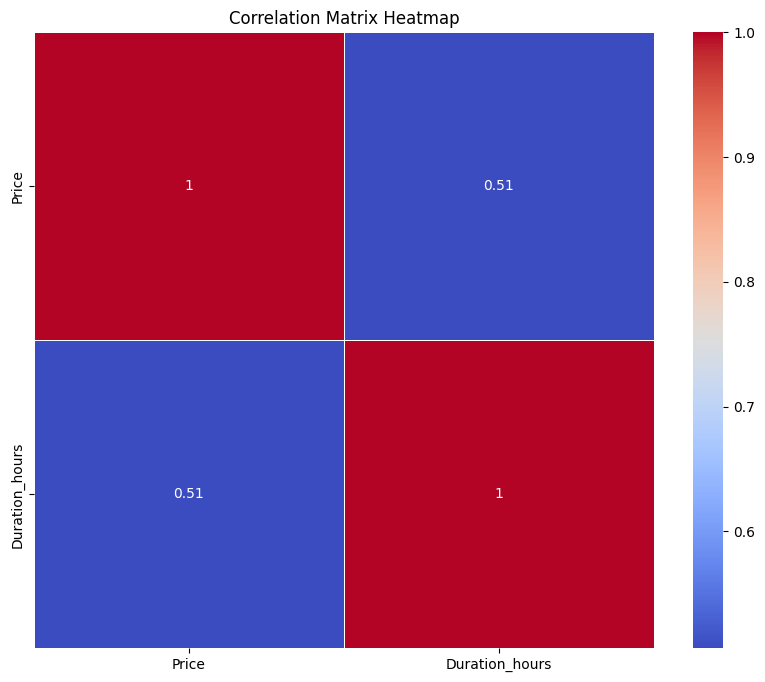

In [11]:
correlation_matrix = df.corr()  # Calculate the correlation matrix

plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)  # Create a heatmap
plt.title('Correlation Matrix Heatmap')  # Set plot title
plt.show()  # Display the heatmap